In [5]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [6]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/ryeol/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [7]:
from nltk.corpus import gutenberg

In [9]:
file_names = gutenberg.fileids()
file_names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
len(doc_alice)

144395

In [13]:
doc_alice[:500]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy an"

In [14]:
from nltk.tokenize import word_tokenize

In [18]:
tokens_alice = word_tokenize(doc_alice)
len(tokens_alice)

33494

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [21]:
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
len(stem_tokens_alice)

33494

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/ryeol/nltk_data...


True

In [35]:
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
len(lem_tokens_alice)

33494

In [36]:
compare_words = {
    'tokenizer': tokens_alice,
    'porster': stem_tokens_alice,
    'lemmatizer': lem_tokens_alice
}

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(compare_words)
df

,tokenizer,porster,lemmatizer
0,[,[,[
1,Alice,alic,Alice
2,'s,'s,'s
3,Adventures,adventur,Adventures
4,in,in,in
...,...,...,...
33489,the,the,the
33490,happy,happi,happy
33491,summer,summer,summer
33492,days,day,day


In [49]:
df[(df.iloc[:,0] != df.iloc[:,1]) & (df.iloc[:,1] != df.iloc[:,2]) & (df.iloc[:,0] != df.iloc[:,2])]

,tokenizer,porster,lemmatizer
58,pictures,pictur,picture
60,conversations,convers,conversation
77,pictures,pictur,picture
128,daisies,daisi,daisy
459,pictures,pictur,picture
...,...,...,...
32471,goes,goe,go
32845,leaves,leav,leaf
33119,creatures,creatur,creature
33317,cries,cri,cry


In [50]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

In [54]:
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
len(reg_tokens_alice)

21616

In [55]:
from nltk.corpus import stopwords

In [57]:
english_stops = set(stopwords.words('english'))
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [58]:
len(english_stops)

179

In [59]:
result_alice = [word for word in reg_tokens_alice if word not in english_stops]
len(result_alice)

12999

In [60]:
result_alice

["alice's",
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 '1865',
 'chapter',
 'rabbit',
 'hole',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 'nothing',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 'pictures',
 'conversations',
 "'and",
 'use',
 'book',
 'thought',
 'alice',
 "'without",
 'pictures',
 'conversation',
 'considering',
 'mind',
 'well',
 'could',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 'whether',
 'pleasure',
 'making',
 'daisy',
 'chain',
 'would',
 'worth',
 'trouble',
 'getting',
 'picking',
 'daisies',
 'suddenly',
 'white',
 'rabbit',
 'pink',
 'eyes',
 'ran',
 'close',
 'nothing',
 'remarkable',
 'alice',
 'think',
 'much',
 'way',
 'hear',
 'rabbit',
 'say',
 "'oh",
 'dear',
 'dear',
 'shall',
 'late',
 'thought',
 'afterwards',
 'occurred',
 'ought',
 'wondered',
 'time',
 'seemed',
 'quite',
 'natural',
 'rabbit',
 'actually',
 'took',
 'watch',
 'waistcoat',
 'pocket',
 'looked',
 'hurried',
 'alice

In [65]:
cnt_result_alice = {}

In [66]:
for word in result_alice:
    if word in cnt_result_alice:
        cnt_result_alice[word] += 1
    else:
        cnt_result_alice[word] = 1

In [67]:
cnt_result_alice

{"alice's": 12,
 'adventures': 7,
 'wonderland': 3,
 'lewis': 1,
 'carroll': 1,
 '1865': 1,
 'chapter': 12,
 'rabbit': 46,
 'hole': 5,
 'alice': 385,
 'beginning': 14,
 'get': 44,
 'tired': 7,
 'sitting': 10,
 'sister': 8,
 'bank': 3,
 'nothing': 30,
 'twice': 5,
 'peeped': 3,
 'book': 11,
 'reading': 3,
 'pictures': 4,
 'conversations': 1,
 "'and": 56,
 'use': 18,
 'thought': 74,
 "'without": 1,
 'conversation': 10,
 'considering': 3,
 'mind': 11,
 'well': 40,
 'could': 77,
 'hot': 7,
 'day': 29,
 'made': 30,
 'feel': 8,
 'sleepy': 5,
 'stupid': 3,
 'whether': 11,
 'pleasure': 2,
 'making': 8,
 'daisy': 1,
 'chain': 1,
 'would': 78,
 'worth': 4,
 'trouble': 6,
 'getting': 22,
 'picking': 2,
 'daisies': 1,
 'suddenly': 13,
 'white': 30,
 'pink': 1,
 'eyes': 29,
 'ran': 16,
 'close': 13,
 'remarkable': 2,
 'think': 53,
 'much': 51,
 'way': 56,
 'hear': 14,
 'say': 51,
 "'oh": 23,
 'dear': 28,
 'shall': 23,
 'late': 6,
 'afterwards': 2,
 'occurred': 2,
 'ought': 14,
 'wondered': 1,
 'tim

In [75]:
len(cnt_result_alice)

2687

In [77]:
sorted_word_count = sorted(cnt_result_alice, key=cnt_result_alice.get, reverse=True)
sorted_word_count

['said',
 'alice',
 'little',
 'one',
 'know',
 'like',
 'went',
 'would',
 'could',
 'thought',
 'time',
 'queen',
 'see',
 'king',
 'began',
 'turtle',
 "'and",
 'way',
 'mock',
 'quite',
 'hatter',
 'gryphon',
 'think',
 'much',
 'say',
 'first',
 'head',
 'thing',
 'voice',
 'rabbit',
 'looked',
 'never',
 'got',
 'get',
 'must',
 'mouse',
 'round',
 'well',
 'came',
 "'you",
 'tone',
 'great',
 "i'm",
 "'but",
 'duchess',
 'dormouse',
 'back',
 'two',
 'cat',
 "'what",
 'march',
 'large',
 'last',
 'long',
 'looking',
 'put',
 'come',
 'things',
 'right',
 'hare',
 'nothing',
 'made',
 'white',
 'found',
 'next',
 'door',
 "'it",
 'heard',
 'day',
 'eyes',
 'moment',
 'tell',
 'replied',
 'dear',
 'look',
 'might',
 'seemed',
 'going',
 'make',
 'good',
 'three',
 "can't",
 'caterpillar',
 'upon',
 'poor',
 "i'll",
 'course',
 'rather',
 'soon',
 'away',
 'without',
 'yet',
 'took',
 "'it's",
 "'oh",
 'shall',
 "'well",
 'felt',
 'half',
 'added',
 'getting',
 'another',
 "'why",


In [80]:
for key in sorted_word_count[:20]:
    print(key, cnt_result_alice[key])

said 462
alice 385
little 128
one 98
know 88
like 85
went 83
would 78
could 77
thought 74
time 71
queen 68
see 67
king 61
began 58
turtle 57
'and 56
way 56
mock 56
quite 55


In [82]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']

In [84]:
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
len(my_words)

7918

In [85]:
alice_word_count = dict()

In [86]:
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1


In [87]:
len(alice_word_count)

1726

In [88]:
alice_word_count

{"alice's": 7,
 'carroll': 1,
 'chapter': 11,
 'rabbit': 42,
 'hole': 5,
 'alice': 293,
 'get': 35,
 'tired': 7,
 'sister': 7,
 'bank': 3,
 'nothing': 30,
 'peeped': 3,
 'book': 11,
 'reading': 1,
 'thought': 54,
 'mind': 11,
 'well': 2,
 'hot': 7,
 'day': 29,
 'feel': 8,
 'sleepy': 5,
 'stupid': 3,
 'pleasure': 2,
 'daisy': 1,
 'chain': 1,
 'worth': 4,
 'trouble': 6,
 'white': 30,
 'pink': 1,
 'ran': 16,
 'remarkable': 2,
 'much': 27,
 'way': 56,
 'hear': 14,
 'dear': 25,
 'occurred': 2,
 'time': 71,
 'seemed': 26,
 'natural': 4,
 'took': 24,
 'watch': 7,
 'waistcoat': 2,
 'pocket': 7,
 'looked': 42,
 'hurried': 8,
 'started': 2,
 'take': 13,
 'burning': 1,
 'curiosity': 5,
 'field': 1,
 'see': 42,
 'pop': 1,
 'large': 33,
 'hedge': 2,
 'moment': 29,
 'went': 83,
 'world': 7,
 'tunnel': 1,
 'dipped': 1,
 'found': 20,
 'fell': 6,
 'plenty': 2,
 'look': 23,
 'wonder': 9,
 'happen': 7,
 'next': 23,
 'first': 30,
 'tried': 15,
 'dark': 3,
 'anything': 19,
 'saw': 14,
 'jar': 2,
 'labelled

In [89]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
sorted_word_count

['said',
 'alice',
 'little',
 'went',
 'time',
 'queen',
 'began',
 'way',
 'turtle',
 'mock',
 'thought',
 'thing',
 'voice',
 'head',
 'gryphon',
 'got',
 'rabbit',
 'looked',
 'see',
 'came',
 'hatter',
 'great',
 'tone',
 'round',
 "i'm",
 'duchess',
 'get',
 'mouse',
 'cat',
 'large',
 'last',
 'march',
 'hare',
 'nothing',
 'white',
 'first',
 'door',
 'day',
 'moment',
 'dormouse',
 'king',
 'know',
 'much',
 'good',
 'tell',
 'seemed',
 'poor',
 'course',
 'replied',
 'caterpillar',
 'dear',
 'right',
 "i'll",
 'took',
 'think',
 'look',
 'next',
 'put',
 'felt',
 "can't",
 'half',
 'heard',
 'added',
 'jury',
 'found',
 'sort',
 'hand',
 'sure',
 'anything',
 'wish',
 'curious',
 'come',
 'old',
 'minute',
 'house',
 'tea',
 'table',
 'something',
 'soup',
 'court',
 'question',
 'long',
 'ran',
 'bit',
 'garden',
 'tried',
 'end',
 "i've",
 'idea',
 'please',
 'spoke',
 'air',
 'turned',
 'low',
 'side',
 'high',
 'face',
 'sat',
 'gave',
 'made',
 'arm',
 'till',
 'hear',
 

In [90]:
for key in sorted_word_count[:20]:
    print(key, alice_word_count[key])

said 462
alice 293
little 124
went 83
time 71
queen 66
began 58
way 56
turtle 56
mock 55
thought 54
thing 49
voice 48
head 46
gryphon 45
got 44
rabbit 42
looked 42
see 42
came 40


In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
y = [alice_word_count[key] for key in sorted_word_count]

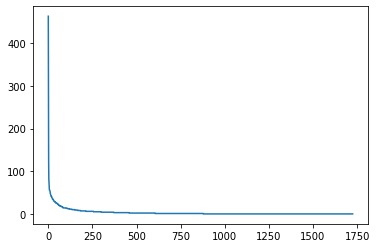

In [108]:
plt.plot(y)

In [110]:
sorted_word_count

['said',
 'alice',
 'little',
 'went',
 'time',
 'queen',
 'began',
 'way',
 'turtle',
 'mock',
 'thought',
 'thing',
 'voice',
 'head',
 'gryphon',
 'got',
 'rabbit',
 'looked',
 'see',
 'came',
 'hatter',
 'great',
 'tone',
 'round',
 "i'm",
 'duchess',
 'get',
 'mouse',
 'cat',
 'large',
 'last',
 'march',
 'hare',
 'nothing',
 'white',
 'first',
 'door',
 'day',
 'moment',
 'dormouse',
 'king',
 'know',
 'much',
 'good',
 'tell',
 'seemed',
 'poor',
 'course',
 'replied',
 'caterpillar',
 'dear',
 'right',
 "i'll",
 'took',
 'think',
 'look',
 'next',
 'put',
 'felt',
 "can't",
 'half',
 'heard',
 'added',
 'jury',
 'found',
 'sort',
 'hand',
 'sure',
 'anything',
 'wish',
 'curious',
 'come',
 'old',
 'minute',
 'house',
 'tea',
 'table',
 'something',
 'soup',
 'court',
 'question',
 'long',
 'ran',
 'bit',
 'garden',
 'tried',
 'end',
 "i've",
 'idea',
 'please',
 'spoke',
 'air',
 'turned',
 'low',
 'side',
 'high',
 'face',
 'sat',
 'gave',
 'made',
 'arm',
 'till',
 'hear',
 

In [117]:
n = sorted_word_count[:20][::-1]
n

['came',
 'see',
 'looked',
 'rabbit',
 'got',
 'gryphon',
 'head',
 'voice',
 'thing',
 'thought',
 'mock',
 'turtle',
 'way',
 'began',
 'queen',
 'time',
 'went',
 'little',
 'alice',
 'said']

In [116]:
y = [alice_word_count[key] for key in n]
y

[40,
 42,
 42,
 42,
 44,
 45,
 46,
 48,
 49,
 54,
 55,
 56,
 56,
 58,
 66,
 71,
 83,
 124,
 293,
 462]

<BarContainer object of 20 artists>

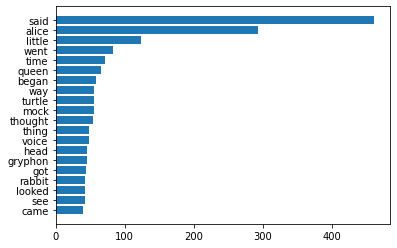

In [120]:
plt.barh(range(len(n)), y, tick_label=n)

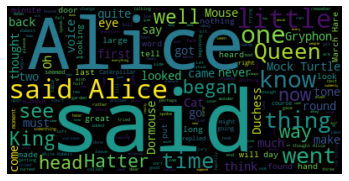

In [126]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

In [129]:
wordcloud.to_array().shape

(200, 400, 3)

In [130]:
wordcloud = WordCloud(max_font_size=60)

In [131]:
alice_word_count

{"alice's": 7,
 'carroll': 1,
 'chapter': 11,
 'rabbit': 42,
 'hole': 5,
 'alice': 293,
 'get': 35,
 'tired': 7,
 'sister': 7,
 'bank': 3,
 'nothing': 30,
 'peeped': 3,
 'book': 11,
 'reading': 1,
 'thought': 54,
 'mind': 11,
 'well': 2,
 'hot': 7,
 'day': 29,
 'feel': 8,
 'sleepy': 5,
 'stupid': 3,
 'pleasure': 2,
 'daisy': 1,
 'chain': 1,
 'worth': 4,
 'trouble': 6,
 'white': 30,
 'pink': 1,
 'ran': 16,
 'remarkable': 2,
 'much': 27,
 'way': 56,
 'hear': 14,
 'dear': 25,
 'occurred': 2,
 'time': 71,
 'seemed': 26,
 'natural': 4,
 'took': 24,
 'watch': 7,
 'waistcoat': 2,
 'pocket': 7,
 'looked': 42,
 'hurried': 8,
 'started': 2,
 'take': 13,
 'burning': 1,
 'curiosity': 5,
 'field': 1,
 'see': 42,
 'pop': 1,
 'large': 33,
 'hedge': 2,
 'moment': 29,
 'went': 83,
 'world': 7,
 'tunnel': 1,
 'dipped': 1,
 'found': 20,
 'fell': 6,
 'plenty': 2,
 'look': 23,
 'wonder': 9,
 'happen': 7,
 'next': 23,
 'first': 30,
 'tried': 15,
 'dark': 3,
 'anything': 19,
 'saw': 14,
 'jar': 2,
 'labelled

In [132]:
wc = wordcloud.generate_from_frequencies(alice_word_count)

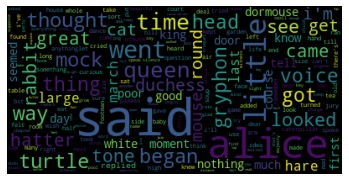

In [135]:
plt.axis("off")
plt.imshow(wc)

In [136]:
import numpy as np

In [137]:
from PIL import Image

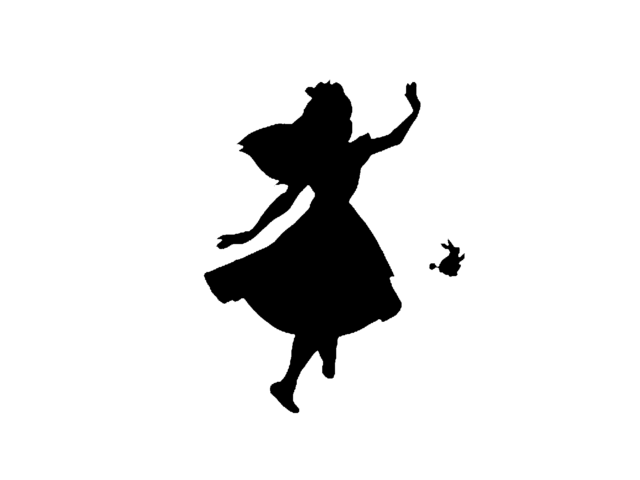

In [139]:
Image.open("alice_mask.png")

In [141]:
alice_mask = np.array(Image.open("alice_mask.png"))
alice_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [142]:
wc = WordCloud(background_color="white",
max_words=30,
mask=alice_mask,
contour_width=3,
contour_color='steelblue'
)

In [143]:
wc.generate_from_frequencies(alice_word_count)

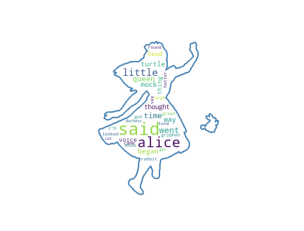

In [144]:
plt.figure()
plt.axis("off")
plt.imshow(wc)

In [147]:
from konlpy.corpus import kolaw

In [148]:
kolaw.fileids()

['constitution.txt']

In [152]:
const_doc = kolaw.open('constitution.txt').read()
const_doc

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [153]:
type(const_doc)

str

In [154]:
len(const_doc)

18884

In [161]:
from konlpy.tag import Okt

In [162]:
t = Okt()

In [163]:
tokens_const = t.morphs(const_doc)
tokens_const

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로',
 '건립',
 '된',
 '대한민국',
 '임시정부',
 '의',
 '법',
 '통과',
 '불의',
 '에',
 '항거',
 '한',
 '4',
 '·',
 '19',
 '민주',
 '이념',
 '을',
 '계승',
 '하고',
 ',',
 '조국',
 '의',
 '민주',
 '개혁',
 '과',
 '평화',
 '적',
 '통일',
 '의',
 '사명',
 '에',
 '입',
 '각하',
 '여',
 '정의',
 '·',
 '인도',
 '와',
 '동포',
 '애',
 '로써',
 '민족',
 '의',
 '단결',
 '을',
 '공고',
 '히',
 '하고',
 ',',
 '모든',
 '사회',
 '적',
 '폐습',
 '과',
 '불의',
 '를',
 '타파',
 '하며',
 ',',
 '자율',
 '과',
 '조화',
 '를',
 '바탕',
 '으로',
 '자유민주',
 '적',
 '기',
 '본',
 '질서',
 '를',
 '더욱',
 '확고히',
 '하여',
 '정치',
 '·',
 '경제',
 '·',
 '사회',
 '·',
 '문화',
 '의',
 '모든',
 '영역',
 '에',
 '있어서',
 '각인',
 '의',
 '기회',
 '를',
 '균등히',
 '하고',
 ',',
 '능력',
 '을',
 '최고',
 '도로',
 '발휘',
 '하게',
 '하며',
 ',',
 '자유',
 '와',
 '권리',
 '에',
 '따르는',
 '책임',
 '과',
 '의무',
 '를',
 '완수',
 '하게',
 '하여',
 ',',
 '안',
 '으로는',
 '국민',
 '생활',
 '의',
 '균등한',
 '향상',
 '을',
 '기하',
 '고',
 '밖',
 '으로는',
 '항구',
 '적',
 '인',
 '세

In [164]:
len(tokens_const)

8796

In [165]:
tokens_const = t.nouns(const_doc)
tokens_const

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제',
 '장',
 '강',
 '제',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '제',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '정',
 '국가',
 '법률',
 '정',
 '바',
 '재외국민',
 '보호',
 '의무',
 '제',
 '대한민국',
 '영토',
 '한반도',
 '그',
 '부속',
 '도서',
 '제',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '제',
 '대한민국',
 '국제',
 '평화',
 '

In [168]:
tokens_const = [word for word in tokens_const if len(word) > 1]

In [169]:
tokens_const

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '각하',
 '정의',
 '인도',
 '동포',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '국민',
 '생활',
 '향상',
 '기하',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '다짐',
 '제정',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전보장',
 '국토',
 '방위',
 '의무',
 '수행',
 '사명',
 '정치',
 '중립성',
 '준수',
 '헌법',


In [170]:
len(tokens_const)

3013

In [171]:
from matplotlib import font_manager, rc

In [173]:
font_name = 'AppleGothic'
rc('font', family=font_name)

In [174]:
const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

In [175]:
const_cnt

{'대한민국': 11,
 '헌법': 53,
 '유구': 1,
 '역사': 1,
 '전통': 1,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '건립': 1,
 '임시정부': 1,
 '통과': 1,
 '불의': 2,
 '항거': 1,
 '민주': 6,
 '이념': 1,
 '계승': 2,
 '조국': 3,
 '개혁': 1,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '각하': 1,
 '정의': 1,
 '인도': 1,
 '동포': 1,
 '로써': 5,
 '민족': 3,
 '단결': 1,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '폐습': 1,
 '타파': 1,
 '자율': 2,
 '조화': 2,
 '바탕': 1,
 '자유민주': 2,
 '질서': 8,
 '더욱': 1,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '각인': 1,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '도로': 1,
 '발휘': 1,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '완수': 1,
 '생활': 8,
 '향상': 5,
 '기하': 1,
 '항구': 1,
 '세계': 1,
 '인류': 1,
 '공영': 1,
 '이바지': 1,
 '자손': 1,
 '안전': 1,
 '행복': 2,
 '확보': 1,
 '다짐': 1,
 '제정': 8,
 '개정': 6,
 '이제': 1,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '민주공화국': 1,
 '주권': 2,
 '권력': 1,
 '요건': 1,
 '법률': 127,
 '국가': 73,
 '재외국민': 1,
 '보호': 14,
 '영토': 2,
 '한반도': 1,
 '부속': 1,
 '도서': 1,
 '지향': 1,
 '입각': 1,
 '정책': 14,
 '수립': 7,
 '추진': 1,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '침략': 1,
 '전쟁': 1,
 '부인': 1,
 '국군': 4,

In [176]:
const_cnt.items()    

dict_items([('대한민국', 11), ('헌법', 53), ('유구', 1), ('역사', 1), ('전통', 1), ('우리', 3), ('국민', 61), ('운동', 2), ('건립', 1), ('임시정부', 1), ('통과', 1), ('불의', 2), ('항거', 1), ('민주', 6), ('이념', 1), ('계승', 2), ('조국', 3), ('개혁', 1), ('평화', 6), ('통일', 6), ('사명', 2), ('각하', 1), ('정의', 1), ('인도', 1), ('동포', 1), ('로써', 5), ('민족', 3), ('단결', 1), ('공고', 3), ('모든', 37), ('사회', 8), ('폐습', 1), ('타파', 1), ('자율', 2), ('조화', 2), ('바탕', 1), ('자유민주', 2), ('질서', 8), ('더욱', 1), ('정치', 9), ('경제', 18), ('문화', 4), ('영역', 4), ('각인', 1), ('기회', 3), ('능력', 3), ('최고', 2), ('도로', 1), ('발휘', 1), ('자유', 20), ('권리', 21), ('책임', 5), ('의무', 18), ('완수', 1), ('생활', 8), ('향상', 5), ('기하', 1), ('항구', 1), ('세계', 1), ('인류', 1), ('공영', 1), ('이바지', 1), ('자손', 1), ('안전', 1), ('행복', 2), ('확보', 1), ('다짐', 1), ('제정', 8), ('개정', 6), ('이제', 1), ('국회', 68), ('의결', 17), ('국민투표', 7), ('민주공화국', 1), ('주권', 2), ('권력', 1), ('요건', 1), ('법률', 127), ('국가', 73), ('재외국민', 1), ('보호', 14), ('영토', 2), ('한반도', 1), ('부속', 1), ('도서', 1), ('지향', 1), ('입각', 1), ('

In [177]:
sorted_w = sorted(const_cnt.items(), key=lambda kv: kv[1])
sorted_w

[('유구', 1),
 ('역사', 1),
 ('전통', 1),
 ('건립', 1),
 ('임시정부', 1),
 ('통과', 1),
 ('항거', 1),
 ('이념', 1),
 ('개혁', 1),
 ('각하', 1),
 ('정의', 1),
 ('인도', 1),
 ('동포', 1),
 ('단결', 1),
 ('폐습', 1),
 ('타파', 1),
 ('바탕', 1),
 ('더욱', 1),
 ('각인', 1),
 ('도로', 1),
 ('발휘', 1),
 ('완수', 1),
 ('기하', 1),
 ('항구', 1),
 ('세계', 1),
 ('인류', 1),
 ('공영', 1),
 ('이바지', 1),
 ('자손', 1),
 ('안전', 1),
 ('확보', 1),
 ('다짐', 1),
 ('이제', 1),
 ('민주공화국', 1),
 ('권력', 1),
 ('요건', 1),
 ('재외국민', 1),
 ('한반도', 1),
 ('부속', 1),
 ('도서', 1),
 ('지향', 1),
 ('입각', 1),
 ('추진', 1),
 ('침략', 1),
 ('전쟁', 1),
 ('부인', 1),
 ('방위', 1),
 ('법규', 1),
 ('국내법', 1),
 ('외국인', 1),
 ('전체', 1),
 ('봉사자', 1),
 ('설립', 1),
 ('복수정당제', 1),
 ('형성', 1),
 ('참여', 1),
 ('자금', 1),
 ('보조', 1),
 ('전통문화', 1),
 ('가치', 1),
 ('추구', 1),
 ('불가침', 1),
 ('인권', 1),
 ('확인', 1),
 ('성별', 1),
 ('특수', 1),
 ('계급', 1),
 ('형태', 1),
 ('창설', 1),
 ('특권', 1),
 ('심문', 1),
 ('보안처분', 1),
 ('강제', 1),
 ('노역', 1),
 ('강요', 1),
 ('해당', 1),
 ('도피', 1),
 ('사후', 1),
 ('스스로', 1),
 ('고지', 1),
 ('일시', 1),
 ('장소',

In [185]:
sorted_w[-20:]

[('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('직무', 19),
 ('국무총리', 19),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('권리', 21),
 ('의원', 21),
 ('사항', 23),
 ('기타', 26),
 ('모든', 37),
 ('헌법', 53),
 ('국민', 61),
 ('국회', 68),
 ('국가', 73),
 ('대통령', 83),
 ('법률', 127)]

In [186]:
n, w = zip(*sorted_w[-20:])

In [187]:
n

('조직',
 '국회의원',
 '임기',
 '직무',
 '국무총리',
 '자유',
 '정부',
 '선거',
 '임명',
 '권리',
 '의원',
 '사항',
 '기타',
 '모든',
 '헌법',
 '국민',
 '국회',
 '국가',
 '대통령',
 '법률')

In [188]:
w

(18,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 23,
 26,
 37,
 53,
 61,
 68,
 73,
 83,
 127)

<BarContainer object of 20 artists>

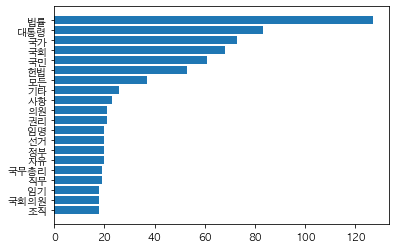

In [189]:
plt.barh(range(len(n)), w, tick_label=n)

In [190]:
plt.savefig('bar.png')

<Figure size 432x288 with 0 Axes>

In [193]:
wordcloud = WordCloud(font_path="'/Library/Fonts/AppleGothic.ttf").generate(const_doc)

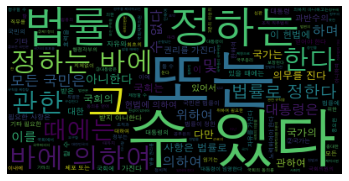

In [194]:
plt.axis("off")
plt.imshow(wordcloud)

In [205]:
wordcloud = WordCloud(
    font_path ="/Library/Fonts/AppleGothic.ttf",
    max_font_size = 100,
    width = 900,
    height = 800,
    background_color="white",
    max_words=50
)

In [206]:
wordcloud.generate_from_frequencies(const_cnt)

In [207]:
wordcloud.to_file("const.png")

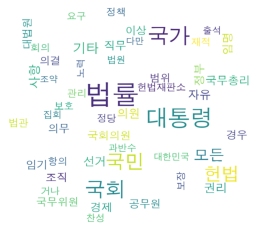

In [208]:
plt.axis("off")
plt.imshow(wordcloud)